##**MSc in Data Science and Economics**
*University of Milan*\
Antonella D'Amico (**961150**)

# **Data Analysis**


1.   Set Environment
2.   Data Cleaning
3.   Data Analysis\
  3.1 Word Cloud

### 1. Set Environement
Connect Google Drive to the notebook and import libraries

In [4]:
!pip install unidecode
!pip install wordcloud
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: matplotlib 3.2.2
Uninstalling matplotlib-3.2.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libpng16-cfdb1654.so.16.21.0
    /usr/local/lib/python3.7/dist-packages/matplotlib.libs/libz-a147dcb0.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /u

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import sys
sys.path.append('/content/drive/MyDrive/Master_Thesis_D_Amico/')

In [15]:
import pickle
import pandas as pd 
import numpy as np
import gensim
import matplotlib.pyplot as plt
from unidecode import unidecode

# Text Cleaning
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from gensim.models import Phrases
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud
from collections import Counter
from PIL import Image

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2. Data Cleaning

Load the labelled dataset.

In [29]:
data = pd.read_csv('/content/drive/MyDrive/Master_Thesis_D_Amico/Dataset_thesis.csv')

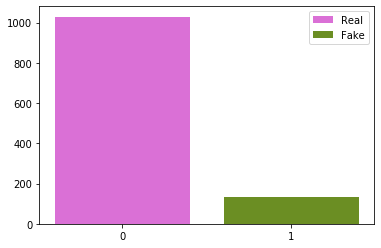

In [30]:
# Fake and real news chart 
freq = data['Label'].value_counts()
fig, ax = plt.subplots()
p1 = ax.bar('0', freq[0], label = 'Real', color = '#DA70D6')
p2 = ax.bar('1', freq[1], label = 'Fake', color = '#6B8E23')
ax.legend()
plt.show()
fig.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/frequence_news.png')

In [31]:
data['Original'] = data['Title'] + ' ' + data['Description']

In [32]:
def clean_text(text):

  text = text.lower()
  text = text.strip() # Remove spaces at the beginning and at the end of the string
  text = re.sub("([0-9]+(?:st|nd|rd|th)+)", " ", text) # Remove ordinal numbers
  text = re.sub("(?!5g)[^a-zA-Z]", " ", text) # Remove numbers and punctuation. Exclude 5g because it is part of our main search keyword
  text = re.sub("\s+", " ", text) # Remove extra space
  text = re.sub("\d+(\.\d+)?","num", text)
  text = re.sub("s/^\s+.*\s+$//", " ", text) # Remove leading and trailing whitespaces
  text = re.sub(r"\b[a-zA-Z]\b", " ", text) # Remove single characters

  text = unidecode(re.sub("\s+", " ", text.strip())) # Remove any additional whitespace
  text = text.strip()
  
  text = text.replace("numg", str('fiveg')) # Replace the trasformation of 5G -> numg -> with fiveg in order to appear in the df

  tokenized_texts = []

  document = word_tokenize(text)

  for token in document:
    if token not in stop_words and len(token) > 1:

      tokenized_texts.append(lemmatizer.lemmatize(token))
  
  tokenized_texts = ' '.join([w for w in tokenized_texts if len(w) > 2 ])

  return tokenized_texts

In [33]:
data['Text_cleaned'] = data['Description'].apply(lambda x: clean_text(x))

In [34]:
# Save cleaned data
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/data.pkl", "wb") as f:
    pickle.dump(data, f)

### 3. Data Analysis

#### 3.1 Creation of word cloud with uppercase words in both fake and real news.

We create a function to extract capital words in title and description

In [ ]:
def extract_upper(text):
  upper = []
  for i in nltk.word_tokenize(text):
      if i.isupper() and i is not gensim.parsing.preprocessing.STOPWORDS and len(i) >= 3 and i not in stopwords.words("english"):
        upper.append(i)
      else:
        continue
  return upper

In [ ]:
# Load back cleaned data
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/data.pkl", "rb") as f:
    data = pickle.load(f)

In [ ]:
data_cloud = data.copy()
data_cloud['Upper_words'] = data_cloud['Description'].apply(lambda x: extract_upper(x))
data_cloud['Upper_words_title'] = data_cloud['Title'].apply(lambda x: extract_upper(x))

In [ ]:
# UPPER WORDS DESCRIPTION

fake_words = []
for words in data_cloud.loc[(data['Label'] == 1, 'Upper_words')]:
  for word in words:
    if len(word) > 1:
      fake_words.append(word)
fake_words = (' ').join(fake_words)
real_words = []
for words in data_cloud.loc[(data_cloud['Label'] == 0, 'Upper_words')]:
  for word in words:
    if len(word) > 1:
      real_words.append(word)
real_words = (' ').join(real_words)

# UPPER WORDS TITLE

fake_words_title = []
for words in data_cloud.loc[(data['Label'] == 1, 'Upper_words_title')]:
  for word in words:
    if len(word) > 1:
      fake_words_title.append(word)
fake_words_title = (' ').join(fake_words_title)
real_words_title = []
for words in data_cloud.loc[(data_cloud['Label'] == 0, 'Upper_words_title')]:
  for word in words:
    if len(word) > 1:
      real_words_title.append(word)
real_words_title = (' ').join(real_words_title)

In [ ]:
mask = '/content/drive/MyDrive/Master_Thesis_D_Amico/images/cloud.png'
mask = np.array(Image.open(mask))

Word Cloud - Title

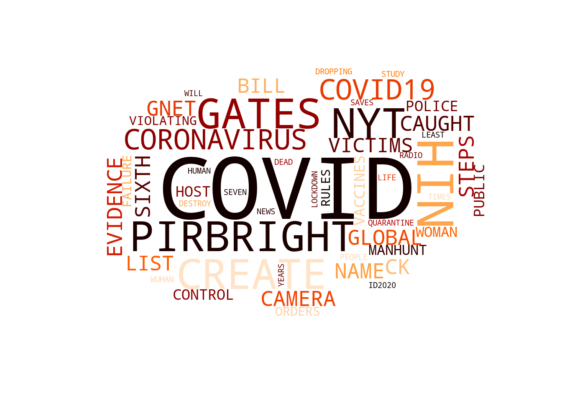

In [ ]:
# Most used uppercase words in fake news
plt.figure(figsize = (10,10)) 
wc = WordCloud(collocations = True, 
               background_color = 'white',
               colormap = 'gist_heat',
               max_words = 50, 
               width = 800, height = 500,
               mask = mask
               ).generate(fake_words_title)
fig = plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
fig.figure.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/fake_title.png')

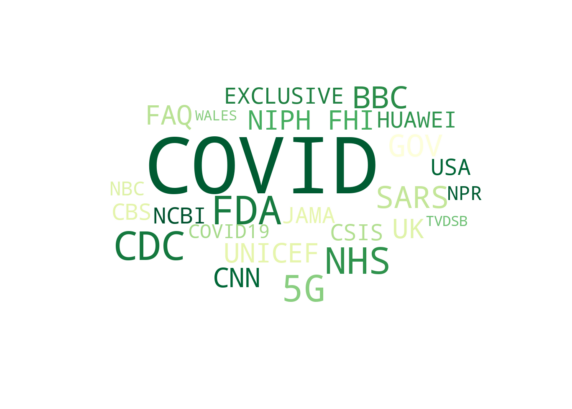

In [ ]:
# Most used uppercase words in fake news
plt.figure(figsize = (10,10)) 
wc = WordCloud(collocations = True, 
               background_color = 'white',
               colormap = 'YlGn_r',
               max_words = 25, 
               width = 800, height = 500,
               mask = mask
               ).generate(real_words_title)
fig = plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
fig.figure.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/real_title.png')

Word Cloud - Description

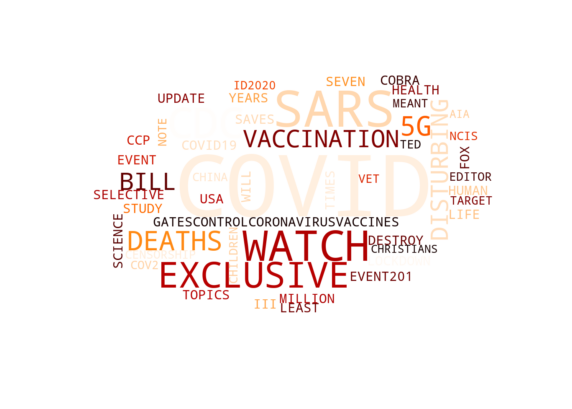

In [ ]:
# Most used uppercase words in fake news
plt.figure(figsize = (10,10)) 
wc = WordCloud(collocations = True, 
               background_color = 'white',
               colormap = 'gist_heat',
               max_words = 50, 
               width = 800, height = 500,
               mask = mask
               ).generate(fake_words)
fig = plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
fig.figure.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/fake_desc.png')

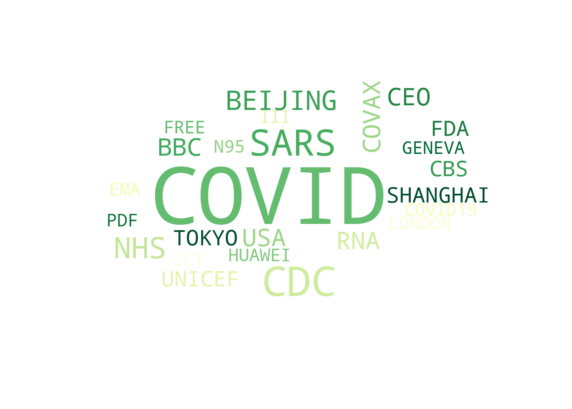

In [ ]:
# Most used uppercase words in real news
plt.figure(figsize = (10,10)) 
wc = WordCloud(collocations = True, 
               background_color = 'white',
               colormap = 'YlGn_r',
               max_words = 25, 
               width = 800, height = 500,
               mask = mask
).generate(real_words)
fig = plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
fig.figure.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/real_desc.png')

We create a function `extract_upper` to extract uppercase words in both real and fake news to perform some data analysis.

#### Cleaned data for Topic Modelling, we remove all the words related to covid in order to make the topic more distinct

In [35]:
new_stopwords = ['covid','corona','covid19','covid-19','coronavirus','fiveg', 'coronaviruses', 'sars', 'cov', 'virus']
stop_words.extend(new_stopwords)

In [36]:
data_topic = pd.read_csv('/content/drive/MyDrive/Master_Thesis_D_Amico/Dataset_thesis.csv')

In [37]:
data_topic['Text_cleaned'] = data_topic['Title'].apply(lambda x: clean_text(x))

In [38]:
# Save cleaned data
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/data_topic.pkl", "wb") as f:
    pickle.dump(data_topic, f)

#### To Run after the costruction of Topic Distribution

In [ ]:
with open("/content/drive/MyDrive/Master_Thesis_D_Amico/pickle/data_topic_mod.pkl", "rb") as f:
    data_topic_mod = pickle.load(f)

In [ ]:
flatten = lambda x: [item for sublist in x for item in sublist]

In [ ]:
flat_total = flatten(data_topic_mod['Text_for_topic'])
counts_total = Counter(flat_total)

In [ ]:
corpus_train_fake = data_topic_mod[data_topic_mod.Label == 1]["Text_for_topic"]
flat_fake = flatten(corpus_train_fake)
counts_fake = Counter(flat_fake)

In [ ]:
corpus_train_real = data_topic_mod[data_topic_mod.Label == 0]["Text_for_topic"]
flat_real = flatten(corpus_train_real)
counts_real = Counter(flat_real)

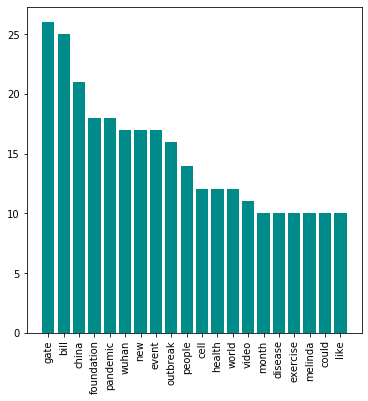

In [ ]:
# Most used word in description in news about COVID-19

dictionary_fake = dict(counts_fake.most_common(20))
keys_fake = dictionary_fake.keys()
values_fake = dictionary_fake.values()

plt.style.use('seaborn-deep')
plt.bar(list(keys_fake), values_fake, alpha = 1, color = '#008B8B')
plt.xticks(list(keys_fake), color='black', rotation=90)
plt.yticks(color='black')
#plt.title("Most common words about COVID-19 on news description")
plt.gcf().set_size_inches(6, 6)
plt.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/most_used_fake.png')
plt.show()

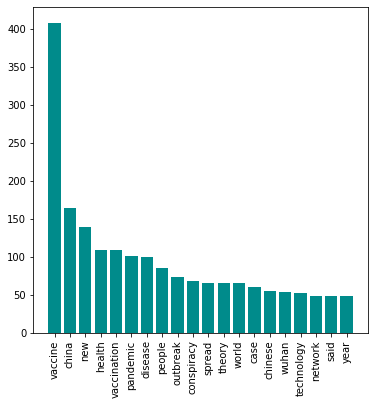

In [ ]:
# Most used word in description in news about COVID-19

dictionary_real = dict(counts_real.most_common(20))
keys_real = dictionary_real.keys()
values_real = dictionary_real.values()

plt.style.use('seaborn-deep')
plt.bar(list(dictionary_real), values_real, alpha = 1, color = '#008B8B')
plt.xticks(list(dictionary_real), color='black', rotation=90)
plt.yticks(color='black')
#plt.title("Most common words about COVID-19 on news description")
plt.gcf().set_size_inches(6, 6)
plt.savefig('/content/drive/MyDrive/Master_Thesis_D_Amico/images/most_used_real.png')
plt.show()